In [ ]:
#importing relevant libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/play_tennis.csv')

In [ ]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
df.tail()

,day,outlook,temp,humidity,wind,play
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [ ]:
df.columns

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [ ]:
df.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [ ]:
df.std()

Series([], dtype: float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


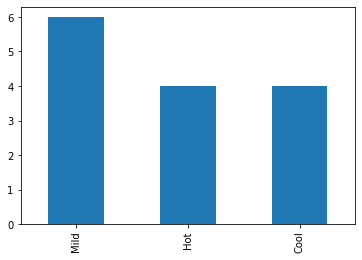

In [ ]:
df["temp"].value_counts().head(10).plot(kind="bar")

In [ ]:
#replace categorical values
Le = LabelEncoder()
df['outlook'] = Le.fit_transform(df['outlook'])
df['temp'] = Le.fit_transform(df['temp'])
df['humidity'] = Le.fit_transform(df['humidity'])
df['wind'] = Le.fit_transform(df['wind'])
df['play'] = Le.fit_transform(df['play'])

In [ ]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1


In [ ]:
# Define the headers since the data does not have any
headers = ["day","outlook","temp","humidity","wind","play"]

In [ ]:
obj_df = df.copy()
obj_df.head()

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1


In [ ]:
obj_df.columns

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [ ]:
obj_df["temp"].value_counts()

2    6
1    4
0    4
Name: temp, dtype: int64

In [ ]:
le=LabelEncoder()


In [ ]:
for col in ['day','outlook','temp','humidity','wind']:
 df[col]=le.fit_transform(df[col])

In [ ]:
df.drop('day',axis=1,inplace=True)

In [ ]:
df['play']=le.fit_transform(df.play)

In [ ]:
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('play',axis=1),df.play)

In [ ]:
gb = GaussianNB()

In [ ]:
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
y_test

13    0
11    1
6     1
1     0
Name: play, dtype: int64

In [ ]:
y_pred

array([0, 1, 1, 0])

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[2, 0],
       [0, 2]])

In [ ]:
t_df = pd.read_csv('/content/tested.csv')

In [ ]:
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
t_df.select_dtypes(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
144,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,17475,NaN,S
145,"Vander Planke, Mr. Julius",male,345763,NaN,S
146,"Hilliard, Mr. Herbert Henry",male,17463,E46,S
147,"Davies, Mr. Evan",male,SC/A4 23568,NaN,S


In [ ]:
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
ti_df.drop(['Name','PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [ ]:
for col in ['Sex','Embarked']:
 t_df[col]=le.fit_transform(t_df[col])

In [ ]:
t_df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         30
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  149 non-null    int64  
 1   Pclass    149 non-null    int64  
 2   Sex       149 non-null    int64  
 3   Age       119 non-null    float64
 4   SibSp     149 non-null    int64  
 5   Parch     149 non-null    int64  
 6   Fare      149 non-null    float64
 7   Embarked  149 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 9.4 KB


In [ ]:
t_df['Age'].fillna(np.mean(t_df['Age']),inplace=True)

In [ ]:
t_df.Fare.fillna(np.mean(t_df['Fare']),inplace=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(t_df.drop(['Survived'],axis=1),t_df.Survived)

In [ ]:
t_gb=GaussianNB()

In [ ]:
t_gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = t_gb.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[23,  0],
       [ 0, 15]])